In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("/content/water-quality-FINAL-cleaned.csv")

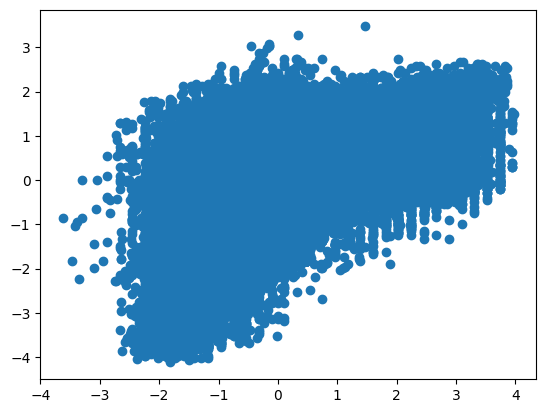

correlation matrix is 
 [[1.         0.41170986]
 [0.41170986 1.        ]]


In [3]:
#correlation matrix
x=df.iloc[:,0]
y=df.iloc[:,1]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
plt.show()
print("correlation matrix is \n",np.corrcoef([x,y]))

In [4]:
pca_columns = ['pH', 'DO', 'Conductivity', 'Temperature', 'Total_N', 'Year',
               'Month', 'Season_numerical', 'Orthophosphate']
X = df[pca_columns]

In [5]:
#standardise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Mean of each feature: {X_scaled.mean(axis=0).round(6)}")
print(f"Std of each feature: {X_scaled.std(axis=0).round(6)}") #confirms

Mean of each feature: [-0. -0.  0.  0.  0. -0. -0.  0. -0.]
Std of each feature: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
pca = PCA() #keep all components

pca.fit(X_scaled)

print(f"Number of components: {pca.n_components_}")
print(f"Shape of components: {pca.components_.shape}")

Number of components: 9
Shape of components: (9, 9)


In [9]:
X_pca = pca.transform(X_scaled)

components = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=components)

print("Transformed data shape:", X_pca_df.shape)
print("\nPrincipal Components (first 5 rows):")
print(X_pca_df.head())
#the first column of this new matrix corresponds to PC1 and explains the majority of the variation

X_pca_df['Year'] = df['Year'].values
X_pca_df['Month'] = df['Month'].values
X_pca_df['Season_numerical'] = df['Season_numerical'].values

Transformed data shape: (138981, 9)

Principal Components (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.428476  1.219423  0.287478  0.510574 -0.527882 -1.221648  0.189977   
1  1.464096  0.525953  0.424249  0.537806 -0.949795 -0.978120 -0.498587   
2  1.240013  1.516159  0.466602  0.460285 -1.024991 -0.630238 -0.345446   
3  1.276522  0.326331  0.491196  0.443697 -1.401225 -0.691475 -0.702821   
4  1.004255  0.815507  0.342766  0.498992 -0.868269 -0.933371  0.346683   

        PC8       PC9  
0 -0.427144 -0.122985  
1 -0.427986  0.404976  
2 -0.353484 -0.281220  
3 -0.276998 -0.309925  
4 -0.255714 -0.402301  


In [10]:
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=components,
    index=pca_columns
)

print(loadings_df)

                       PC1       PC2       PC3       PC4       PC5       PC6  \
pH               -0.000245  0.732215  0.270214 -0.025787 -0.049175  0.042103   
DO               -0.436926  0.375609  0.141544 -0.014048 -0.098570  0.176980   
Conductivity      0.112328 -0.137656  0.491359  0.518421  0.613377 -0.143462   
Temperature       0.429974  0.412658  0.214404  0.022049  0.018335 -0.065529   
Total_N          -0.286950 -0.213603  0.417314  0.275330 -0.253568  0.620713   
Year             -0.016555  0.128609 -0.323210  0.784859 -0.440263 -0.260160   
Month             0.483921 -0.101207 -0.026483  0.031139 -0.192682  0.464678   
Season_numerical  0.537120  0.021777 -0.008529  0.033765 -0.117294  0.202618   
Orthophosphate    0.079426 -0.246290  0.583229 -0.189658 -0.549806 -0.481749   

                       PC7       PC8       PC9  
pH                0.007422 -0.117334  0.610055  
DO                0.568178  0.135855 -0.515229  
Conductivity      0.244635 -0.034795  0.019216  
Tem

In [11]:
output_path = "PCA_transformed_dataset.csv"
df.to_csv(output_path, index=False)

In [12]:
PCA_df = pd.read_csv("/content/PCA_transformed_dataset.csv")

In [13]:
PCA_df.head()

,pH,DO,Conductivity,Temperature,Total_N,Orthophosphate,Year,Month,Season,Season_numerical
0,0.903448,-0.121627,0.004939,0.926817,-0.911018,0.029471,2015,8,Summer,3
1,0.783984,-0.858708,-0.052245,0.753946,-0.363770,0.046118,2015,8,Summer,3
2,1.103978,0.020234,-0.106052,1.203410,-0.363770,0.025256,2015,8,Summer,3
3,0.254928,-0.518440,-0.135834,0.995965,-0.034853,0.056022,2015,8,Summer,3
4,0.476790,0.215664,-0.035970,0.719372,-0.596279,0.039585,2015,8,Summer,3


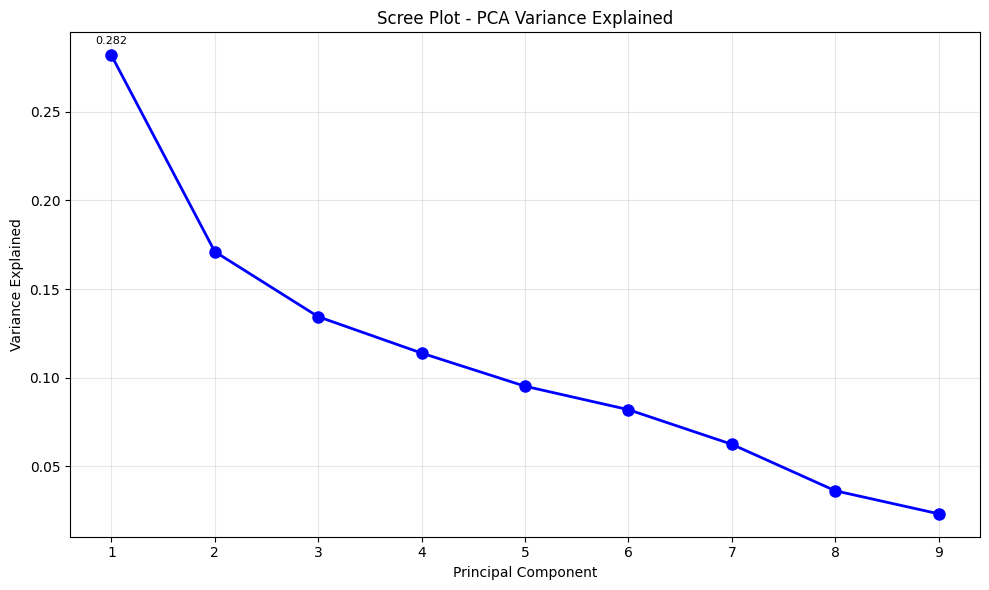

In [14]:
#Scree plot: The x-axis displays the principal component and the y-axis displays the percentage of total variance explained by each individual principal component.
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=8)
plt.title('Scree Plot - PCA Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True, alpha=0.3)

for i, (pc, var) in enumerate(zip(PC_values, cumulative_variance)):
    if i % 2 == 0:
        plt.annotate(f'{var:.3f}', (pc, var), textcoords="offset points",
                     xytext=(0,8), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [15]:
print(pca.explained_variance_ratio_)

[0.28191396 0.171091   0.13438381 0.11384545 0.0951512  0.08193023
 0.0623696  0.03615791 0.02315684]


In [16]:
print(f"Total components: {pca.n_components_}")
print(f"Total variance explained: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1]*100:.2f}%)")

#optimal number of components
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Components needed for 95% variance: {n_components_95}")
print(f"Variance explained by first 2 components: {cumulative_variance[1]:.4f} ({cumulative_variance[1]*100:.2f}%)")

Total components: 9
Total variance explained: 1.0000 (100.00%)
Components needed for 95% variance: 8
Variance explained by first 2 components: 0.4530 (45.30%)
